# Plot of SST/HF radar data for S-MODE

Uses data from [HFRnet THREDDS server](http://hfrnet-tds.ucsd.edu/thredds/catalog.html)

Draws from https://github.com/rowg/HFRnet-Thredds-support/blob/master/PythonNotebooks/TimeseriesRTVfromSIO_TDS.ipynb


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
import functions  # requires functions.py from this repository
import datetime


In [2]:
%matplotlib inline
# %matplotlib widget
# %matplotlib qt5
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 700
plt.close('all')

__figdir__ = '../plots/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'



In [3]:
savefig = False
zoom = True
if zoom:
    xmin, xmax = (-125.5,-123)
    ymin, ymax = (36.5,38)
    levels = np.linspace(0,0.75,21)
    zoom_str='_zoom'
else:
    xmin, xmax = (-126,-122)
    ymin, ymax = (36, 39)
    levels = np.linspace(0,0.75,21)
    zoom_str=''


In [4]:
# Time in UTC
# startTime="2021-11-2 00:00 UTC"
endTime="2022-10-30 10:00 UTC"
time_delta=datetime.timedelta(hours=2)

# startTimeDT=datetime.datetime.strptime(startTime, '%Y-%m-%d %H:%M %Z')
endTimeDT=datetime.datetime.strptime(endTime, '%Y-%m-%d %H:%M %Z')
startTimeDT=endTimeDT-time_delta

In [5]:
url = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/6km/hourly/RTV/HFRADAR_US_West_Coast_6km_Resolution_Hourly_RTV_best.ncd'
ds=xr.open_dataset(url,drop_variables=['hdop','dopx','dopy',]).sel(time=slice(startTimeDT,endTimeDT))

In [6]:
ds

<xarray.Dataset>
Dimensions:                (lat: 367, lon: 234, time: 3, time_1: 1, nv: 2)
Coordinates:
  * lat                    (lat) float32 30.25 30.3 30.36 ... 49.88 49.94 49.99
  * lon                    (lon) float32 -130.4 -130.3 -130.2 ... -115.9 -115.8
  * time                   (time) datetime64[ns] 2022-10-30T08:00:00 ... 2022...
    time_run               (time) datetime64[ns] ...
Dimensions without coordinates: time_1, nv
Data variables:
    time_bnds              (time_1, nv) int32 ...
    depth_bnds             (nv) float32 ...
    wgs84                  int8 ...
    processing_parameters  int8 ...
    radial_metadata        int8 ...
    depth                  float32 ...
    time_offset            (time) datetime64[ns] ...
    u                      (time, lat, lon) float32 ...
    v                      (time, lat, lon) float32 ...
    number_of_sites        (time, lat, lon) float32 ...
    number_of_radials      (time, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:               CF-1.4, ACDD-1.3
    id:                        202210310300siohfruwlsrtvuswc6km
    date_created:              2022-10-31T04:53:17Z
    source:                    surface ocean velocity field from hf-radar
    program:                   Integrated Ocean Observing System (IOOS)
    title:                     Near-Real Time Surface Ocean Velocity, U.S. We...
    ...                        ...
    format_version:            1.1.00
    product_version:           2.0.00
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:HFRADAR_US_West_Coast_6km_Resolutio...

In [7]:
time_index = -1
ds.time.dt.strftime("%a, %b %d %H:%M").values[time_index]

'Sun, Oct 30 10:00'

In [8]:
nanmask = np.isnan(ds.u).sum('time')>1
mask = np.where(nanmask.values,np.nan,0)

In [9]:
# speed=np.sqrt(ds.u.isel(time=time_index)**2+ds.v.isel(time=time_index)**2)
speed=np.sqrt(mask+ds.u.mean('time')**2+ds.v.mean('time')**2)
np.shape(speed)

(367, 234)

/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/tmp/ipykernel_19473/4170661501.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')


Text(-125.48333333333333, 37.5025, '10 km')

/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:256: Sh

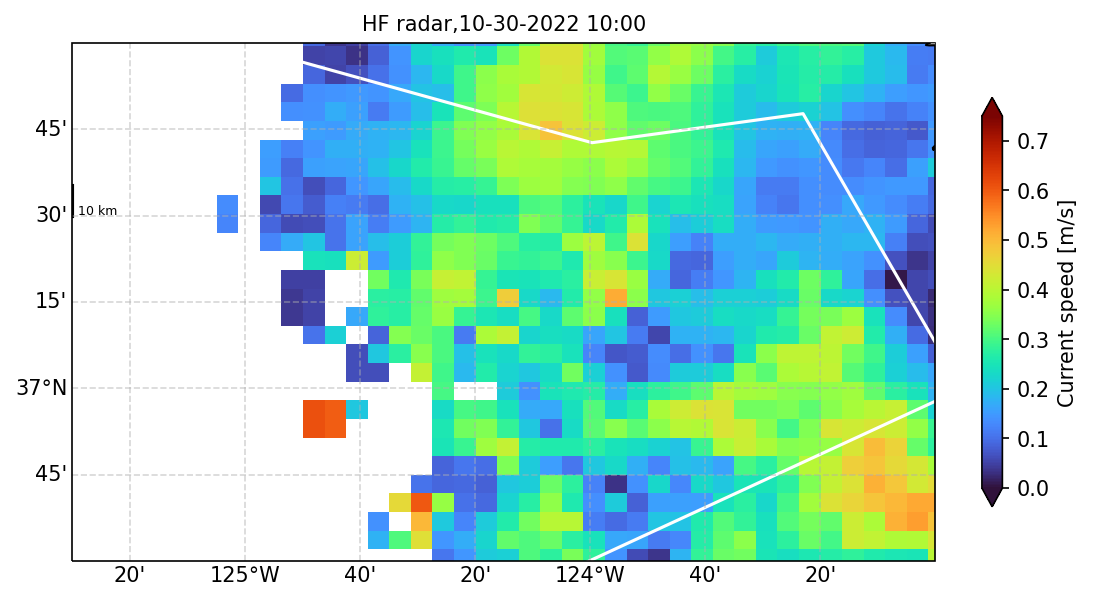

In [10]:
fig = plt.figure('UV_map')
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=-125))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())

day_str=ds.time.dt.strftime("%m-%d-%Y %H:%M").values[time_index]
day_str2=ds.time.dt.strftime("%m-%d-%Y").values[time_index]

ax.set_title('HF radar,' + day_str, size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
# cs = ax.contourf(ds.lon,ds.lat,np.squeeze(ds.sea_surface_temperature)-273.15, levels, extend='both', transform=ccrs.PlateCarree())
cs = ax.pcolormesh(ds.lon,ds.lat,speed, vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022,extend='both')
cb.set_label('Current speed [m/s]',fontsize = 10)
functions.plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
deg_lat_equal_10km=10/km_per_deg_lat
x0 = -125.5 
y0 = 37.5
ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')
ax.text(x0+1/60, y0+.15/60, '10 km', fontsize=6,transform=ccrs.PlateCarree())


In [11]:
# ax.quiver(ds.lon.values, ds.lat.values, ds.u.isel(time=time_index).values, ds.v.isel(time=time_index).values,  scale=10, transform=ccrs.PlateCarree())
ax.quiver(ds.lon.values, ds.lat.values, mask+ds.u.mean('time').values, ds.v.mean('time').values,  scale=10, transform=ccrs.PlateCarree())
x0 = -125.5 
y0 = 37
ax.quiver(np.array([x0]), np.array([y0]), np.array([0.25/np.sqrt(2)]), np.array([0.25/np.sqrt(2)]), scale=10, transform=ccrs.PlateCarree())
ax.text(x0+3/60, y0+.15/60, '0.25 m/s', fontsize=6,transform=ccrs.PlateCarree())
plt.show()

In [12]:
if savefig:
    plt.figure('UV_map')
    plt.savefig(__figdir__+'HF_radar_' + day_str2 + zoom_str + '.' +plotfiletype,**savefig_args)

In [13]:
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/VIIRS_NRT/VIIRS_NRT_20221029T100000Z.nc'; V = [14,19]; zoom = 4

/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


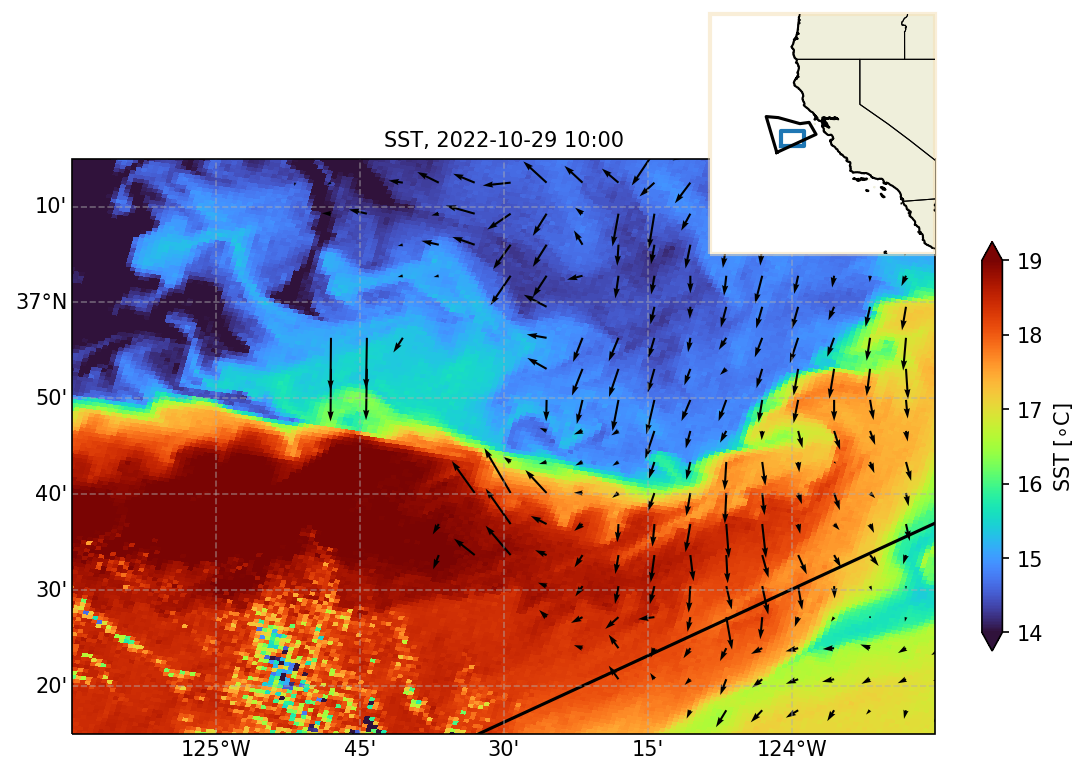

In [14]:
time_window = 20
zoom_str = 'zoom' + str(zoom)
(ax, day_str) = functions.sst_map_SMODE(url,zoom,V,time_window)
ax.quiver(ds.lon.values, ds.lat.values, mask+ds.u.mean('time').values, ds.v.mean('time').values,  scale=10, transform=ccrs.PlateCarree())


In [15]:
ds

<xarray.Dataset>
Dimensions:                (lat: 367, lon: 234, time: 3, time_1: 1, nv: 2)
Coordinates:
  * lat                    (lat) float32 30.25 30.3 30.36 ... 49.88 49.94 49.99
  * lon                    (lon) float32 -130.4 -130.3 -130.2 ... -115.9 -115.8
  * time                   (time) datetime64[ns] 2022-10-30T08:00:00 ... 2022...
    time_run               (time) datetime64[ns] 2022-10-30T08:00:00 ... 2022...
Dimensions without coordinates: time_1, nv
Data variables:
    time_bnds              (time_1, nv) int32 1667183400 1667187000
    depth_bnds             (nv) float32 0.0 2.4
    wgs84                  int8 -127
    processing_parameters  int8 -127
    radial_metadata        int8 -127
    depth                  float32 1.4
    time_offset            (time) datetime64[ns] 2012-01-01 ... 2012-01-01
    u                      (time, lat, lon) float32 nan nan nan ... nan nan nan
    v                      (time, lat, lon) float32 nan nan nan ... nan nan nan
    number_of_sites        (time, lat, lon) float32 ...
    number_of_radials      (time, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:               CF-1.4, ACDD-1.3
    id:                        202210310300siohfruwlsrtvuswc6km
    date_created:              2022-10-31T04:53:17Z
    source:                    surface ocean velocity field from hf-radar
    program:                   Integrated Ocean Observing System (IOOS)
    title:                     Near-Real Time Surface Ocean Velocity, U.S. We...
    ...                        ...
    format_version:            1.1.00
    product_version:           2.0.00
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:HFRADAR_US_West_Coast_6km_Resolutio...

In [16]:
N=7
#ulow = functions.run_avg2d(functions.run_avg2d(ds.u.mean('time').values, N, 1),N,2)
#vlow = functions.run_avg2d(functions.run_avg2d(ds.v.mean('time').values, N, 1),N,2)
ulow = functions.run_avg2d(functions.run_avg2d(ds.u[0].values, N, 1),N,2)
vlow = functions.run_avg2d(functions.run_avg2d(ds.v[0].values, N, 1),N,2)

In [17]:
uhigh = ds.u[0].values-ulow
vhigh = ds.v[0].values-vlow
#ax.quiver(ds.lon.values, ds.lat.values, mask+ds.u.mean('time').values, ds.v.mean('time').values,  scale=10, transform=ccrs.PlateCarree())

/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:256: Sh

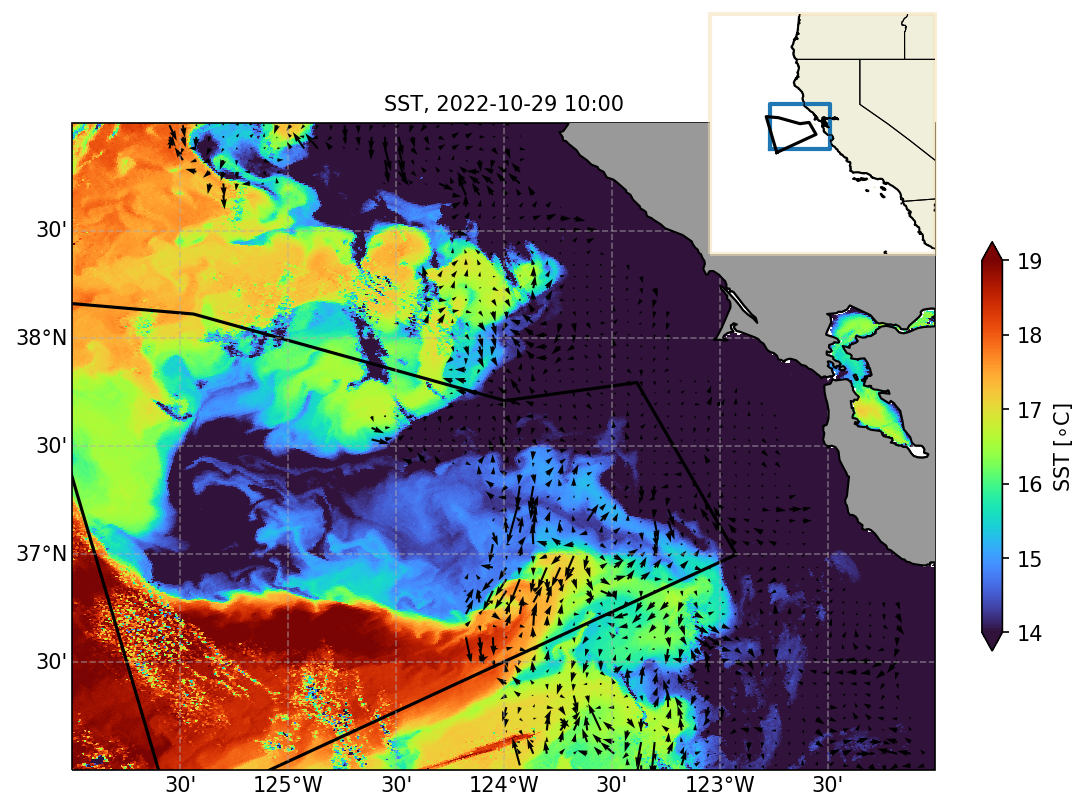

In [18]:
time_window = 20

(ax, day_str) = functions.sst_map_SMODE(url,1,V,time_window)
ax.quiver(ds.lon.values, ds.lat.values, uhigh, vhigh,  scale=10, transform=ccrs.PlateCarree())

In [19]:
dsfdsfdsa

NameError: name 'dsfdsfdsa' is not defined

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.quiver(ds.lon.values, ds.lat.values, ds.u.mean('time').values, ds.v.mean('time').values,  scale=10, transform=ccrs.PlateCarree())
xmin, xmax = (-125,-123)
ymin, ymax = (36, 38.0)
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False


In [ ]:
np.shape(ds.lat.where(nanmask).values)

In [ ]:
np.shape(ds.u.mean('time').where(nanmask).values)

In [ ]:
saildrones=functions.get_current_position('saildrone')#,'ko', markersize=3,transform=ccrs.PlateCarree())
hSD = ax.plot(saildrones['longitude'],saildrones['latitude'],'wo',markersize=5,transform=ccrs.PlateCarree())
wg=functions.get_current_position('waveglider')#,'ko', markersize=3,transform=ccrs.PlateCarree())
hWG = ax.plot(wg['longitude'],wg['latitude'],'mo',markersize=5,transform=ccrs.PlateCarree())

In [ ]:
if savefig:
    plt.savefig(__figdir__+'SST_UV_' + day_str2 + zoom_str + '.' +plotfiletype,**savefig_args)

In [ ]:
plt.rcParams['savefig.dpi']

In [ ]:
plt.rcParams['figure.figsize'] 